In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [7]:
df.price.describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [15]:
df.sqft_living

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

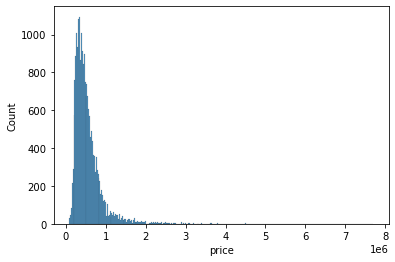

In [14]:
sns.histplot(df.price)

<AxesSubplot:ylabel='Count'>

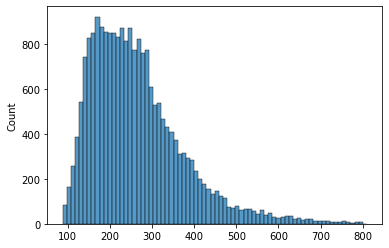

In [16]:
sns.histplot(df.price/df.sqft_living)

<AxesSubplot:ylabel='Count'>

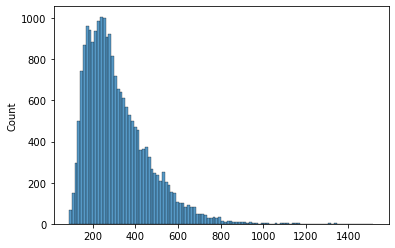

In [17]:
sns.histplot(df.price/(df.sqft_above))

In [18]:
sns.histplot(df.price/(df.sqft_basement))

TypeError: unsupported operand type(s) for /: 'float' and 'str'

In [19]:
df.sqft_basement

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement, Length: 21597, dtype: object

In [24]:
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1275.0        1
266.0         1
666.0         1
207.0         1
243.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [27]:
df.sqft_basement.apply(lambda x: 0 if x == '?')

SyntaxError: invalid syntax (<ipython-input-27-0d64361ad733>, line 1)

In [28]:
df_b = df

In [29]:
df_b.loc[df_b['sqft_basement']=='?'] = 0

In [30]:
df_b.sqft_basement.describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

In [35]:
df_b['sqft_basement_float'] = df_b.sqft_basement.apply(lambda x: float(x))

In [42]:
df_b['sqft_basement_float']

0          0.0
1        400.0
2          0.0
3        910.0
4          0.0
         ...  
21592      0.0
21593      0.0
21594      0.0
21595      0.0
21596      0.0
Name: sqft_basement_float, Length: 21597, dtype: float64

In [43]:
df_b['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

<AxesSubplot:ylabel='Count'>

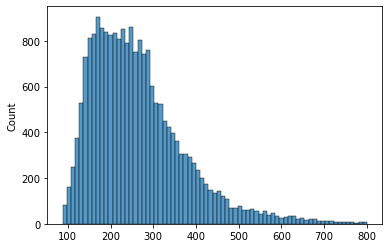

In [45]:
sns.histplot(df_b.price/(df_b.sqft_basement_float+df_b.sqft_above))

In [48]:
import numpy as np

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

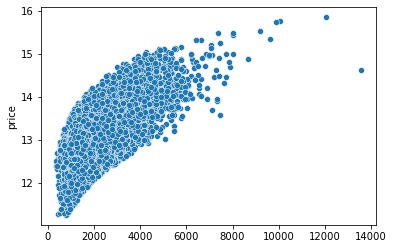

In [49]:
sns.scatterplot((df_b.sqft_basement_float+df_b.sqft_above),np.log(df_b.price))

In [50]:
#compare R2 for price and log(price)
#single variable regression

C:\Users\Nel-Jiren\Anaconda\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='price'>

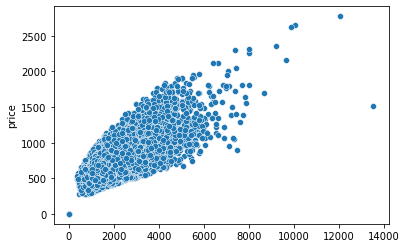

In [51]:
sns.scatterplot((df_b.sqft_basement_float+df_b.sqft_above),np.sqrt(df_b.price))